In [1]:
print("============查看GPU信息================")
# 查看GPU信息
!/opt/bin/nvidia-smi
print("==============查看pytorch版本==============")
# 查看pytorch版本
import torch
print(torch.__version__)
print("============查看虚拟机硬盘容量================")
# 查看虚拟机硬盘容量
!df -lh
print("============查看cpu配置================")
# 查看cpu配置
!cat /proc/cpuinfo | grep model\ name
print("=============查看内存容量===============")
# 查看内存容量
!cat /proc/meminfo | grep MemTotal

============查看GPU信息================
Tue May 16 06:13:51 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A100-SXM...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   31C    P0    46W / 400W |      0MiB / 40960MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                    

# Dependency

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!cp -r /content/drive/MyDrive/Colab_data/MC_without_pp.h5ad /content/

In [2]:
# install dependecy 
!pip install scvi-tools scanpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 330.3/330.3 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 55.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.0/103.0 kB 15.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 11.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.2/300.2 kB 36.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 730.7/730.7 kB 52.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 829.5/829.5 kB 71.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 kB 53.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 13.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━

In [3]:
pip install --user scikit-misc

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 98.5 MB/s eta 0:00:00


In [3]:
import numpy as np
import pandas as pd
import scanpy as sc
import scvi
import seaborn as sns

from matplotlib.pyplot import rc_context

sc.set_figure_params(dpi=100, color_map = 'viridis_r', transparent=False, frameon=False)
sc.settings.verbosity = 1
sc.logging.print_header()

%config InlineBackend.figure_format = 'retina'

INFO:lightning_fabric.utilities.seed:Global seed set to 0


scanpy==1.9.3 anndata==0.9.1 umap==0.5.3 numpy==1.22.4 scipy==1.10.1 pandas==1.5.3 scikit-learn==1.2.2 statsmodels==0.13.5 pynndescent==0.5.10


# Doublets

In [4]:
adata_MC = sc.read('/content/MC_without_pp.h5ad')

In [5]:
sc.pp.filter_cells(adata_MC, min_genes=200) #get rid of cells with fewer than 200 genes
sc.pp.filter_genes(adata_MC, min_cells=3) #get rid of genes that are found in fewer than 3 cells
sc.pp.highly_variable_genes(adata_MC, n_top_genes = 2000, subset = True, flavor = 'seurat_v3')

In [6]:
scvi.model.SCVI.setup_anndata(adata_MC)
vae = scvi.model.SCVI(adata_MC)
vae.train(max_epochs=400)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:You are using a CUDA device ('NVIDIA A100-SXM4-40GB') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 400/400: 100%|██████████| 400/400 [16:47<00:00,  2.51s/it, loss=446, v_num=1]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|██████████| 400/400 [16:47<00:00,  2.52s/it, loss=446, v_num=1]


In [7]:
solo = scvi.external.SOLO.from_scvi_model(vae)
solo.train()

INFO     Creating doublets, preparing SOLO model.                                                                  


/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1755: FutureWarning: The AnnData.concatenate method is deprecated in favour of the anndata.concat function. Please use anndata.concat instead.

See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:You are using a CUDA device ('NVIDIA A100-SXM4-40GB') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_pre

Epoch 306/400:  76%|███████▋  | 306/400 [13:47<04:14,  2.71s/it, loss=0.216, v_num=1]
Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.189. Signaling Trainer to stop.


In [8]:
df = solo.predict()
df['prediction'] = solo.predict(soft = False)

df.index = df.index.map(lambda x: x[:-2])

df

,doublet,singlet,prediction
AAACCTGAGAATGTGT-0,-0.823375,1.298272,singlet
AAACCTGAGCGATGAC-0,1.442155,-1.596713,doublet
AAACCTGAGCGCCTCA-0,-0.599264,0.753591,singlet
AAACCTGAGGCTAGCA-0,-0.954037,1.406163,singlet
AAACCTGAGGTAGCCA-0,-1.140872,1.358109,singlet
...,...,...,...
TTTGTCATCACGACTA-3,-3.123315,3.386414,singlet
TTTGTCATCACTCTTA-3,-3.439154,4.401706,singlet
TTTGTCATCGGGAGTA-3,-1.411461,1.687862,singlet
TTTGTCATCTAACTCT-3,-0.530888,1.195226,singlet


In [9]:
df.groupby('prediction').count()

,doublet,singlet
prediction,,
doublet,5147,5147
singlet,33311,33311


In [10]:
df['dif'] = df.doublet - df.singlet
df

,doublet,singlet,prediction,dif
AAACCTGAGAATGTGT-0,-0.823375,1.298272,singlet,-2.121648
AAACCTGAGCGATGAC-0,1.442155,-1.596713,doublet,3.038868
AAACCTGAGCGCCTCA-0,-0.599264,0.753591,singlet,-1.352855
AAACCTGAGGCTAGCA-0,-0.954037,1.406163,singlet,-2.360200
AAACCTGAGGTAGCCA-0,-1.140872,1.358109,singlet,-2.498981
...,...,...,...,...
TTTGTCATCACGACTA-3,-3.123315,3.386414,singlet,-6.509729
TTTGTCATCACTCTTA-3,-3.439154,4.401706,singlet,-7.840859
TTTGTCATCGGGAGTA-3,-1.411461,1.687862,singlet,-3.099324
TTTGTCATCTAACTCT-3,-0.530888,1.195226,singlet,-1.726114


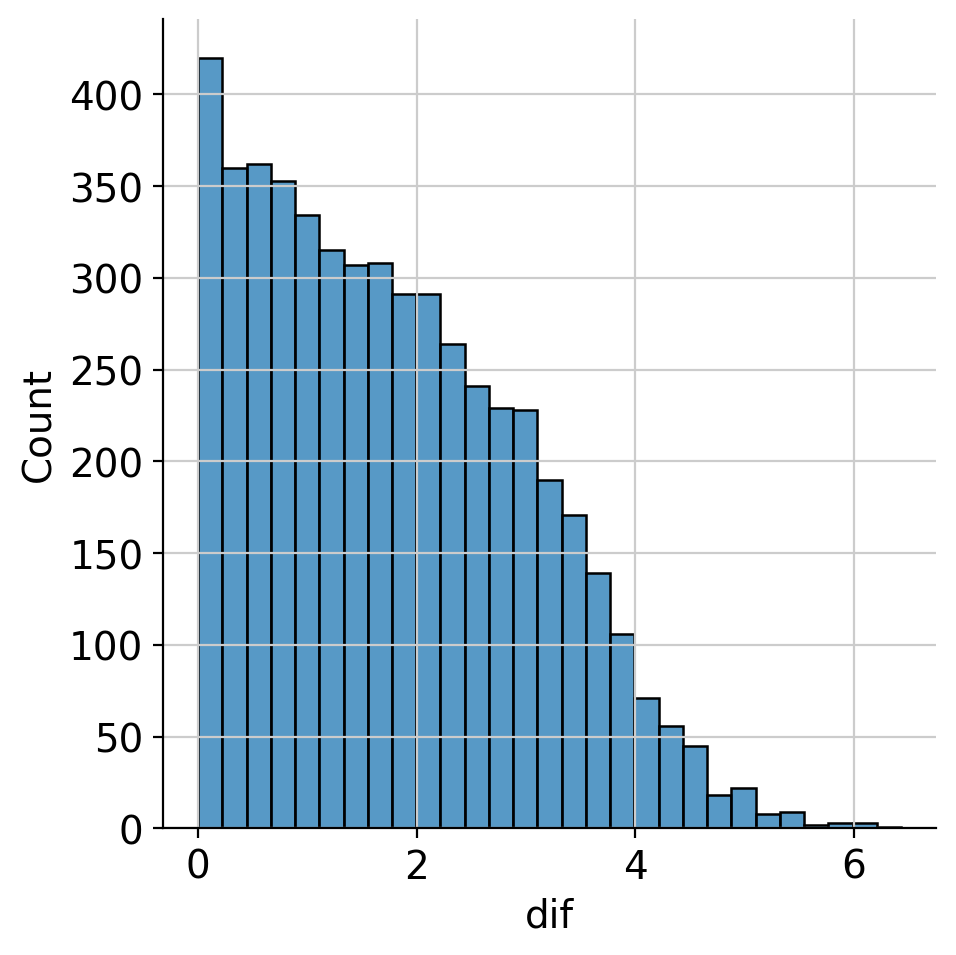

In [11]:
sns.displot(df[df.prediction == 'doublet'], x = 'dif')

In [12]:
doublets = df[(df.prediction == 'doublet') & (df.dif > 1)]
doublets

,doublet,singlet,prediction,dif
AAACCTGAGCGATGAC-0,1.442155,-1.596713,doublet,3.038868
AAACGGGAGGGAGTAA-0,0.289224,-0.777187,doublet,1.066411
AAAGATGGTAGCGTAG-0,1.594549,-1.640674,doublet,3.235222
AAAGATGGTCGCTTCT-0,1.817517,-1.961787,doublet,3.779304
AAAGATGTCGGCTACG-0,2.959748,-2.717326,doublet,5.677073
...,...,...,...,...
TTTGCGCGTGGCGAAT-3,0.990000,-1.506200,doublet,2.496200
TTTGGTTGTGTCGCTG-3,0.988546,-1.026951,doublet,2.015497
TTTGGTTTCATCATTC-3,1.203300,-1.108597,doublet,2.311897
TTTGTCAAGGGTCGAT-3,1.083317,-1.414328,doublet,2.497645


In [13]:
adata_MC.obs

,initial_size_spliced,initial_size_unspliced,initial_size,Phenotype,donor_id,batch,n_genes,_scvi_batch,_scvi_labels
AAACCTGAGAATGTGT-0,526,591,526.0,MG_crisis,Patient_1,0,2267,0,0
AAACCTGAGCGATGAC-0,320,653,320.0,MG_crisis,Patient_1,0,2418,0,0
AAACCTGAGCGCCTCA-0,257,624,257.0,MG_crisis,Patient_1,0,2102,0,0
AAACCTGAGGCTAGCA-0,268,518,268.0,MG_crisis,Patient_1,0,1953,0,0
AAACCTGAGGTAGCCA-0,193,393,193.0,MG_crisis,Patient_1,0,1557,0,0
...,...,...,...,...,...,...,...,...,...
TTTGTCATCACGACTA-3,292,351,292.0,After_crisis,Patient_2,3,1466,0,0
TTTGTCATCACTCTTA-3,105,124,105.0,After_crisis,Patient_2,3,514,0,0
TTTGTCATCGGGAGTA-3,284,613,284.0,After_crisis,Patient_2,3,1971,0,0
TTTGTCATCTAACTCT-3,271,412,271.0,After_crisis,Patient_2,3,1273,0,0


In [14]:
adata_MC.obs['doublet'] = adata_MC.obs.index.isin(doublets.index)

In [15]:
adata_MC.obs[['doublet']].to_csv('adata_MC_doublet.csv')